# Crime Analysis

This report is an analysis on the criminal incident data from San Francisco. The analaysis focuses on the first 10 ideas from the assignment.  Visualization on the number of crimes is available by time of day, types of crimes and areas during summer in 2014. Correlation plot among incident types on a day-by-day basis is also provided in Fig. 8. Crime incident types have been modified in the data from Seattle and San Francisco by investigating the description to see the differences in crime patterns between the cities.

In [7]:
library(ggplot2); library(chron); library(plyr); library(reshape2); library(reshape); library(lattice); library(devtools)
setwd("C:/Users/Jiyun/Documents/Data_Science")
sf <- read.csv(file = "sanfrancisco_incidents_summer_2014.csv", header= TRUE, na.strings = "NA", as.is = T)
sea <- read.csv(file = "seattle_incidents_summer_2014.csv", header= TRUE, na.strings = "NA", as.is = T)

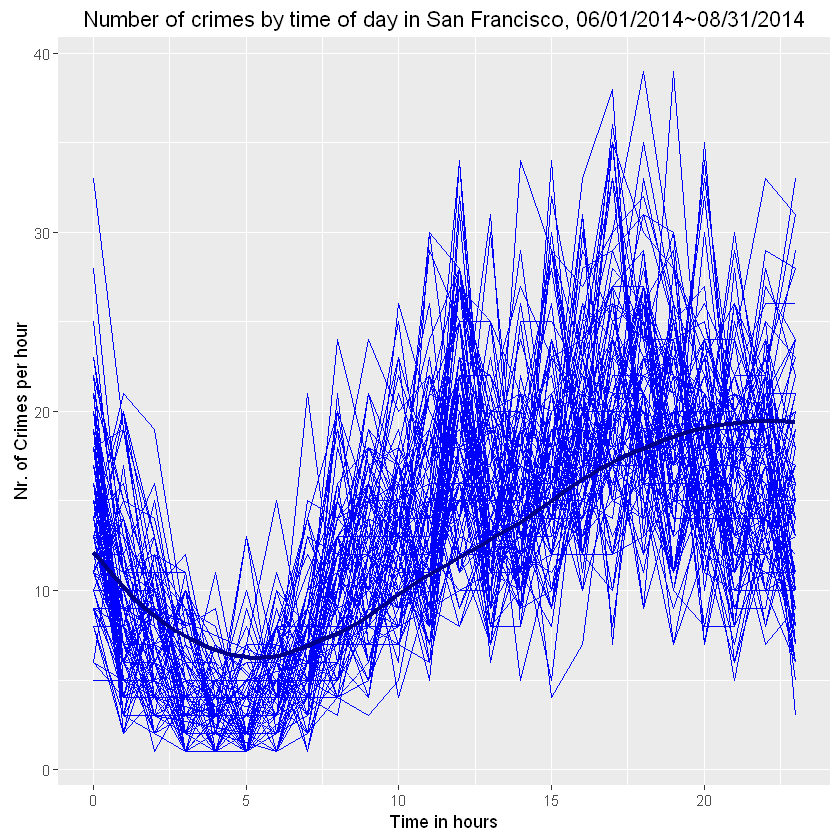

In [13]:
## Fig. 1##
a <- unique(sf$Date)
for (i in 1:length(a)) {
  y <- sf[which(sf$Date == a[i]),]
  y$Hour <- format(as.POSIXct(y$Time, format = "%H"), format="%H")
  y$Hour <- as.numeric(y$Hour)
  y$Ncrimes <- 1
  variables1 <- c("Hour","Ncrimes")
  variables2 <- c("Hour")
  Ncrimes <- ddply(y[variables1], variables2, summarise, Ncrimes = sum(Ncrimes))
  if (i==1){
    p_train <- ggplot(data=Ncrimes, aes(x=Hour, y=Ncrimes)) + ylab("Nr. of Crimes per hour") + xlab("Time in hours") + 
    ggtitle("Number of crimes by time of day in San Francisco, 06/01/2014~08/31/2014")
  }
    p_train <- p_train + geom_line(data=Ncrimes, aes(x=Hour, y=Ncrimes), color = "blue", size=0.04) 
}
p_train+stat_smooth(se=F, colour="darkblue", size=1.4)

Figure 1.	The total number of Incidents in San Francisco varied by the time of day. Each line in light blue shows the number of incidents every hour in a day and the thick blue line shows the estimates from Loess fit on the numbers. It shows the lowest incident number around 5am and the highest around 10 pm between June 1st and Aug. 31st 2014.

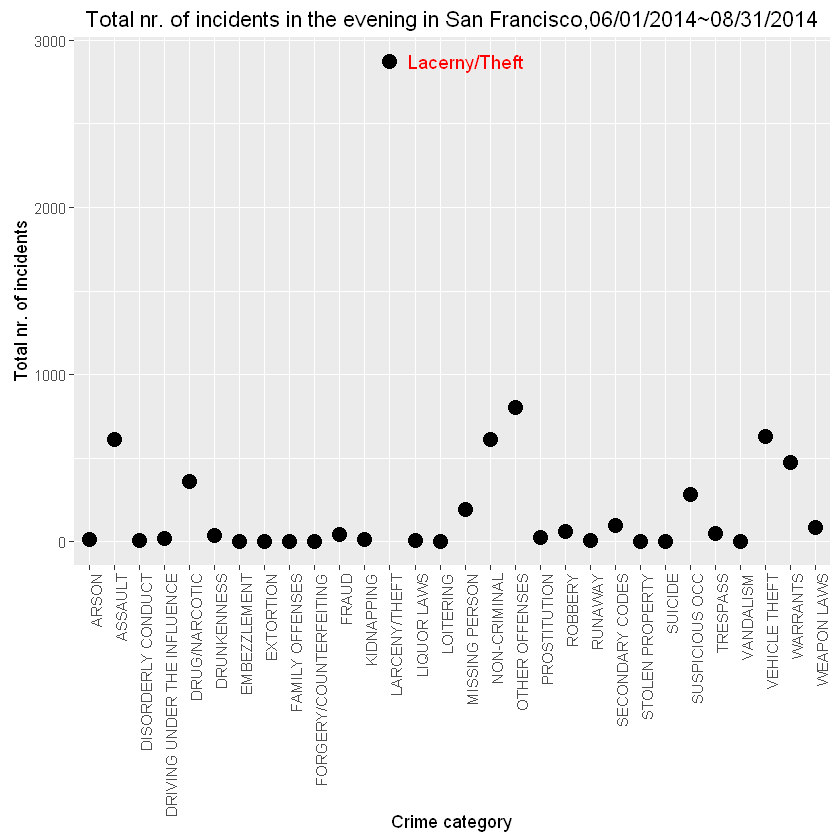

In [70]:
## Fig. 2##
sf$Hour <- format(as.POSIXct(sf$Time, format = "%H"), format="%H")
sf$Hour <- as.numeric(sf$Hour)
yy <- sf[sf$Hour > 16 & sf$Hour <21,]
yy$Ncrimes <- 1
variables3 <- c("Category", "Ncrimes")
variables4 <- c("Category")
Ncrimes1 <- ddply(yy[variables3], variables4, summarise, Ncrimes = sum(Ncrimes))
evening_crime <- ggplot(data=Ncrimes1, aes(x=Category, y=Ncrimes) )+theme(axis.text.x = element_text(angle = 90, hjust = 1))
evening_crime + geom_point(size=4)+ylab("Total nr. of incidents")+ xlab("Crime category") +
    ggtitle("Total nr. of incidents in the evening in San Francisco,06/01/2014~08/31/2014")+
    annotate("text", label = "Lacerny/Theft", x=16, y=2875, size=4, colour="red")

Figure 2.	There were 2872 incidents of Larceny/Theft in the evening in San Francisco between June 1st and Aug. 31st 2014. This is the highest count among all categories.
 

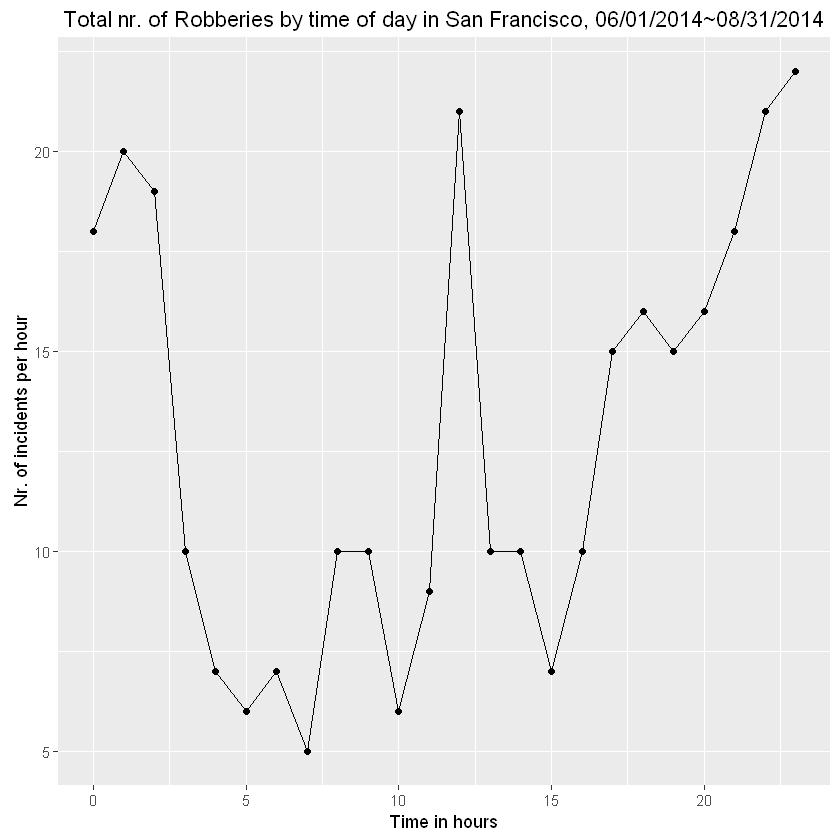

In [71]:
## Fig. 3 ##
y1 <- sf[which(sf$Category == "ROBBERY"),]
y1$Hour <- format(as.POSIXct(y1$Time, format = "%H"), format="%H")
y1$Hour <- as.numeric(y1$Hour)
y1$Ncrimes <- 1
variables5 <- c("Hour","Ncrimes")
variables6 <- c("Hour")
Ncrimes2 <- ddply(y1[variables5], variables6, summarise, Ncrimes = sum(Ncrimes))
p_train <- ggplot(data=Ncrimes2, aes(x=Hour, y=Ncrimes)) +geom_point()+ylab("Nr. of incidents per hour") + 
    xlab("Time in hours") + 
    ggtitle("Total nr. of Robberies by time of day in San Francisco, 06/01/2014~08/31/2014")
p_train+geom_line()

Figure 3.	Around 11pm the number of robberies are most common. It is also common around noon and 1am.

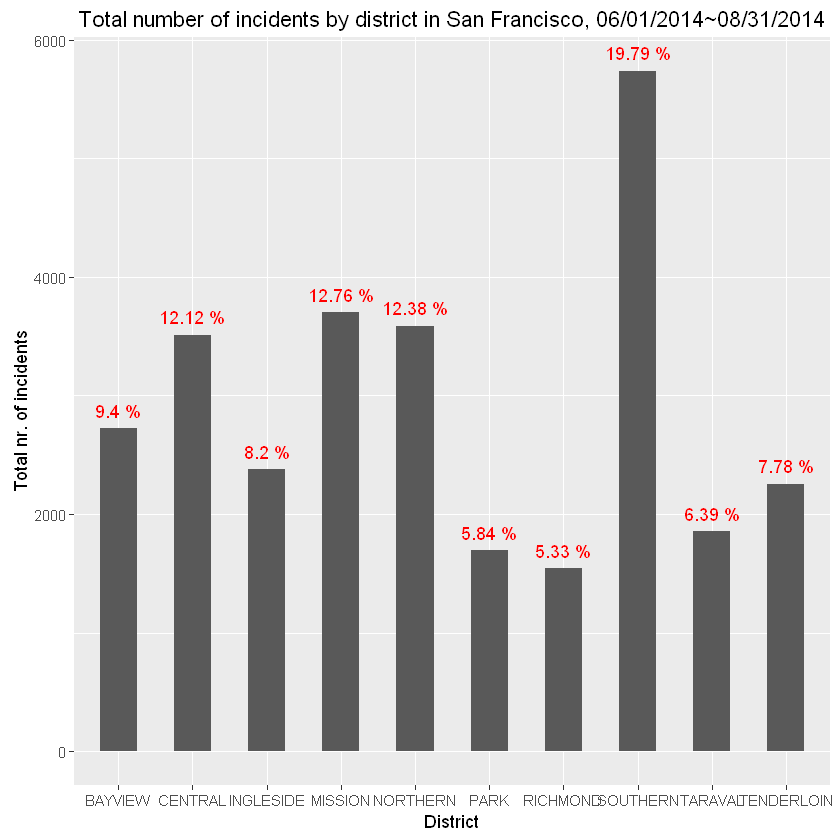

In [72]:
## Fig. 4 ##
sf$Ncrimes<-1
sf$Percentage<- 1/28993*100
variables7 <- c("PdDistrict", "Ncrimes","Percentage")
variables8 <- c("PdDistrict")
Ncrimes3 <- ddply(sf[variables7], variables8, summarise, Ncrimes = sum(Ncrimes), Percentage = sum(Percentage))
p_train <- ggplot(data = Ncrimes3, aes(x=factor(PdDistrict), y=Ncrimes)) + geom_bar(stat="identity", width=.5)+
    xlab("District")+ylab("Total nr. of incidents")+
    ggtitle("Total number of incidents by district in San Francisco, 06/01/2014~08/31/2014")
p_train+geom_text(data=Ncrimes3, aes(label=paste(round(Percentage, digits=2), "%")),vjust=-0.8, colour="red")

Figure 4.	The incident counts have the highest in Southern and the lowest in Richmond.

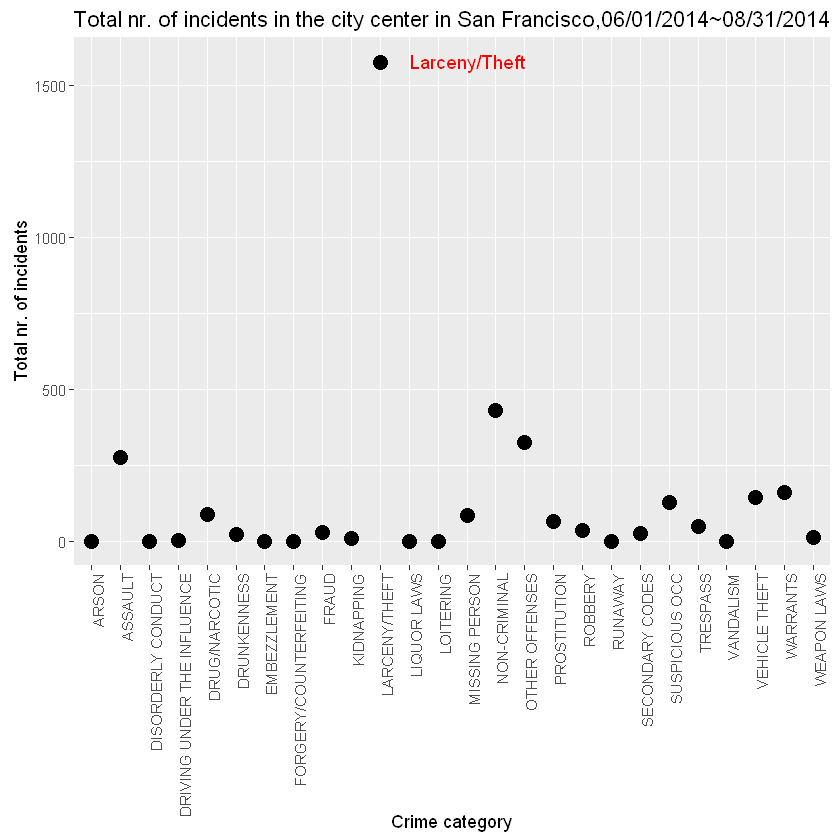

In [69]:
## Fig. 5 ##
y2 <- sf[which(sf$PdDistrict == "CENTRAL"),]
y2$Ncrimes<-1
Ncrimes4 <- ddply(y2[variables3], variables4, summarise, Ncrimes = sum(Ncrimes))
central_crime <- ggplot(data=Ncrimes4, aes(x=Category, y=Ncrimes) )+theme(axis.text.x = element_text(angle = 90, hjust = 1))
central_crime + geom_point(size=4)+ylab("Total nr. of incidents")+ xlab("Crime category") +
    ggtitle("Total nr. of incidents in the city center in San Francisco,06/01/2014~08/31/2014")+
    annotate("text", label = "Larceny/Theft", x=14, y=1580, size=4, colour="red")

Figure 5.	Larceny/Theft occurs most in the city center.

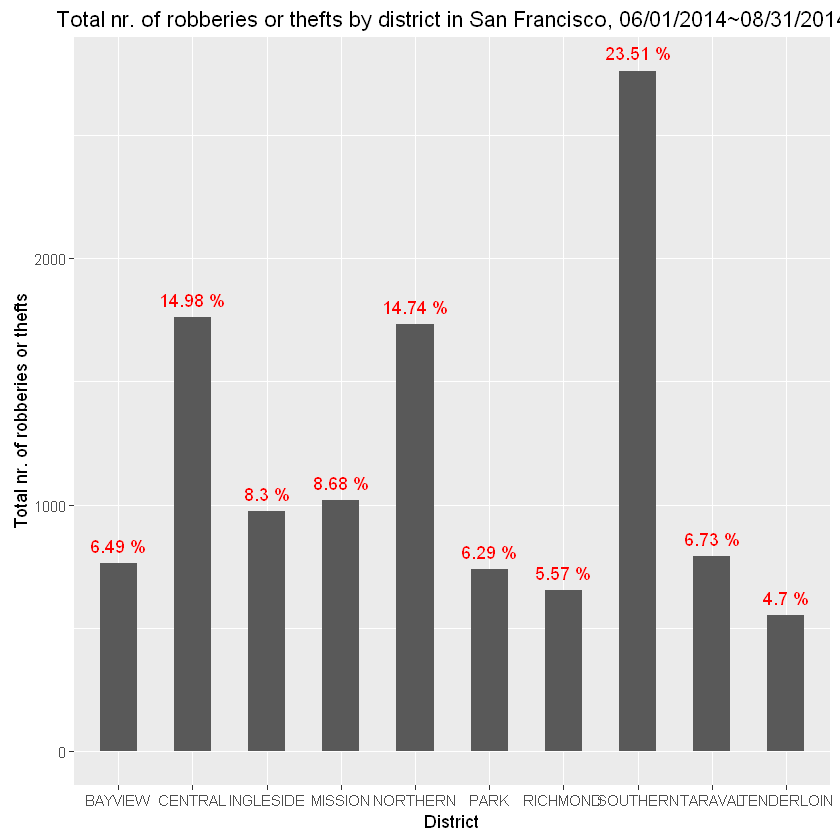

In [52]:
## Fig. 6##
y3 <- rbind(sf[which(sf$Category == "ROBBERY"),], sf[grep("THEFT", sf$Category),])
y3$Ncrimes<-1
y3$Percentage<- 1/nrow(y3)*100
Ncrimes5 <- ddply(y3[variables7], variables8, summarise, Ncrimes = sum(Ncrimes), Percentage = sum(Percentage))
p_train <- ggplot(data = Ncrimes5, aes(x=factor(PdDistrict), y=Ncrimes)) + geom_bar(stat="identity", width=.5)+
    xlab("District")+ylab("Total nr. of robberies or thefts")+
    ggtitle("Total nr. of robberies or thefts by district in San Francisco, 06/01/2014~08/31/2014")
p_train+geom_text(data=Ncrimes5, aes(label=paste(round(Percentage, digits=2), "%")),vjust=-0.8, colour="red")

Figure 6.	Southern has the most counts in robberies or thefts among all the district in San Francisco. Percentage is shown in red.

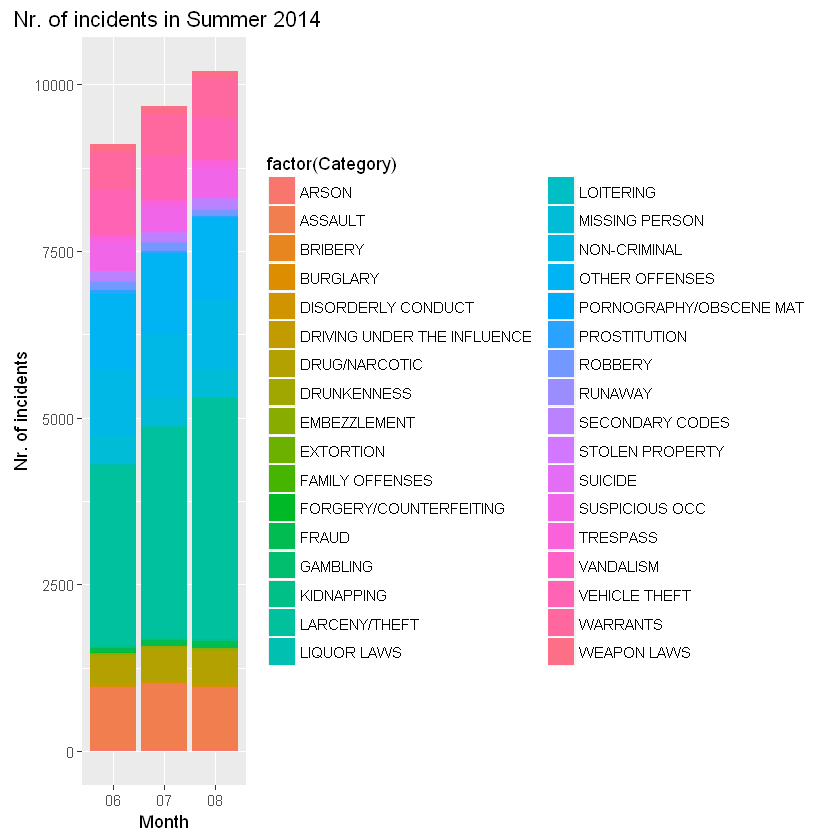

In [68]:
## Fig. 7 ##
sf$Month <- format(as.POSIXct(sf$Date, format = "%m/%d/%Y"), format="%m")
Ncrimes6 <-  ddply(sf, .(Month, Category), summarize, Ncrimes = sum(Ncrimes))
Ncrimes6 <- rbind(Ncrimes6, c("06", "BRIBERY",0), c("08", "BRIBERY", 0), c("07","BURGLARY", 0), c("08","EXTORTION", 0), 
                  c("06", "GAMBLING", 0), c("07", "GAMBLING", 0),c("06", "LOITERING", 0),
                  c("07", "LOITERING", 0),c("06","PORNOGRAPHY/OBSCENE MAT", 0),c("08","PORNOGRAPHY/OBSCENE MAT", 0))
Ncrimes6$Ncrimes <- as.numeric(Ncrimes6$Ncrimes)

qplot(factor(Month), data=sf, geom="bar", fill = factor(Category)) +geom_bar(width = 0.3)+
  xlab("Month")+ylab("Nr. of incidents") +
    ggtitle( " Nr. of incidents in Summer 2014")

Figure 7.	Overall number of incidents increases mainly due to the increase in Larceny/Theft. 

Using Category, Date as id variables


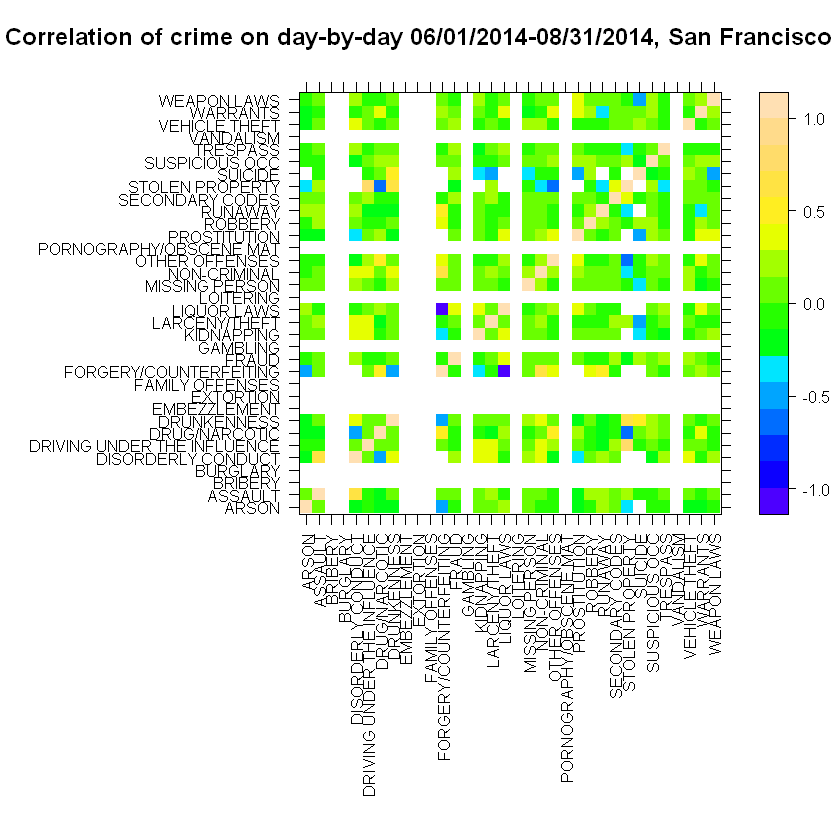

In [73]:
## Fig. 8 ##
temp <- ddply(sf, .(Category, Date), summarize, Ncrimes  = sum(Ncrimes))
temp <- melt(temp)
Ncrimes7 <- as.data.frame(cast(temp, Date~Category))
rownames(Ncrimes7) <- Ncrimes7[,1]
Ncrimes7 <- Ncrimes7[,2:ncol(Ncrimes7)]
cor_mat <-  cor(Ncrimes7,use="pairwise", method="spearman")
options(warn=-1)
levelplot(cor_mat, xlab=NULL, ylab=NULL,  scales=list(x=list(rot=90)),
          main = "Correlation of crime on day-by-day 06/01/2014-08/31/2014, San Francisco",
          par.settings=list(regions=list(col=topo.colors(100))))

Figure 8.	On a day-by-day basis, plot shows positive correlation in light color and negative correlation in blue among incident types. Stolen property is negatively related with Drug/Narcotics or with Other offenses, although it has positively related with Driving under the influence or Drunkenness. Forgery/counterfeiting is closely related to Runaway or Non-criminal. 

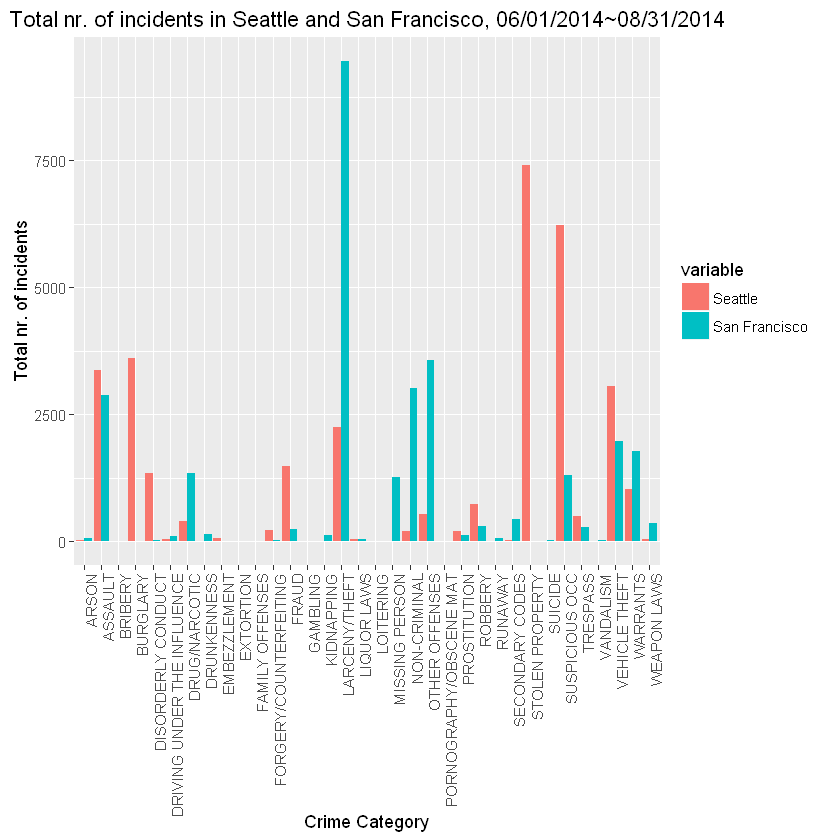

In [47]:
## Fig. 9 ##
variable9 <- c("Category", "Descript")
variable10 <- c("Category")
#unique(ddply(sf[variable9],variable10)) # looking for descript in the crime category

sea$newCategory<- sea$Summarized.Offense.Description
a <- unique(sf$Category)
b <- unique(sea$Summarized.Offense.Description)
b <- b[-which(unique(sea$Summarized.Offense.Description) %in% unique(sf$Category))]
for (k in 1:length(b)){
  if (k == 1){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[3] #Larnecy/THEFT
  }
  if (k==23){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[3] #Larnecy/THEFT
  }
  if (k==12){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[3] #Larnecy/THEFT
  }
  if (k==11){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[3] #Larnecy/THEFT
  }
  if (k==17){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[3] #Larnecy/THEFT
  }
  if(k ==2){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[24]
  }
  if(k == 9){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[24]
  }
  if(k == 3){  
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[29]
  }
  if(k ==4){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[25]
  }
  if(k ==5){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[11] 
  }
  if(k==6){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[9] 
  }
  if(k==24){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[9] 
  }
  if(k==28){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[9] 
  }
  if(k==29){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[9] 
    sea$newCategory[sea$Offense.Type == "THREATS-WEAPON"] <- a[13]
  }
  if(k==7){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[29] 
  }
  if(k==8){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[29] 
  }
  if(k==10){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[26]
  }
  if(k==13){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[4] #DRUG/NARCOTIC
  }
  if(k ==14){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[2]
  }
  if(k==25){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[2]
  }
  if(k==15){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[15]
  }
  if(k==16){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==19){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==20){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==26){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==31){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==33){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==36){
   sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==37){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[6] #OTHER OFFENSES
  }
  if(k==18){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[23] #DISORDERLY CONDUCT
  }
  if(k==38){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[23] #DISORDERLY CONDUCT
  }
  if(k==21){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[19] 
  }
  if(k==22){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[12] 
  }
  if(k==27){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[1] 
  }
  if(k==30){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[10] #FRAUD 
  }
  if(k==32){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[30] # RUNAWAY
  }
  if(k==39){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[30] # RUNAWAY
  }
  if(k==34){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[33] # PORNOGRAPHY/OBSCENE MAT
  }
  if(k==35){
    sea$newCategory[sea$Summarized.Offense.Description == b[k]] <- a[5] # DRIVING UNDER THE INFLUENCE
  }
}
sea$Ncrimes<-1
var1 <- c("newCategory","Ncrimes")
var2 <- c("newCategory")
N_sea <- ddply(sea[var1], var2, summarise, Ncrimes = sum(Ncrimes))
N_sf <- ddply(sf[variables3], variables4,summarise, Ncrimes = sum(Ncrimes))
colnames(N_sea) <- colnames(N_sf)
Ncrimes8 <- merge(N_sea, N_sf, by="Category", all=TRUE)
colnames(Ncrimes8) <-c("Category","Seattle","San Francisco")
Ncrimes8_m <- melt(Ncrimes8[,c('Category', 'Seattle','San Francisco')], id.vars=1)
p_train <- ggplot(data = Ncrimes8_m, aes(x=Category, y=value)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_bar(aes(fill = variable), stat="identity",position = "dodge") +
  xlab("Crime Category") +  ylab("Total nr. of incidents") +
  ggtitle("Total nr. of incidents in Seattle and San Francisco, 06/01/2014~08/31/2014")
p_train

Figure 9.	We can hardly tell the similarity in crime patterns between Seattle and San Francisco even with efforts to re-categorize Seattle crime to the one in San Francisco. The descriptions on the Larceny/Theft and stolen property differ, so the two categories left unchanged. However, if we categorize Larceny/Theft and stolen property into one, it will give us the highest peaks in both cities. 

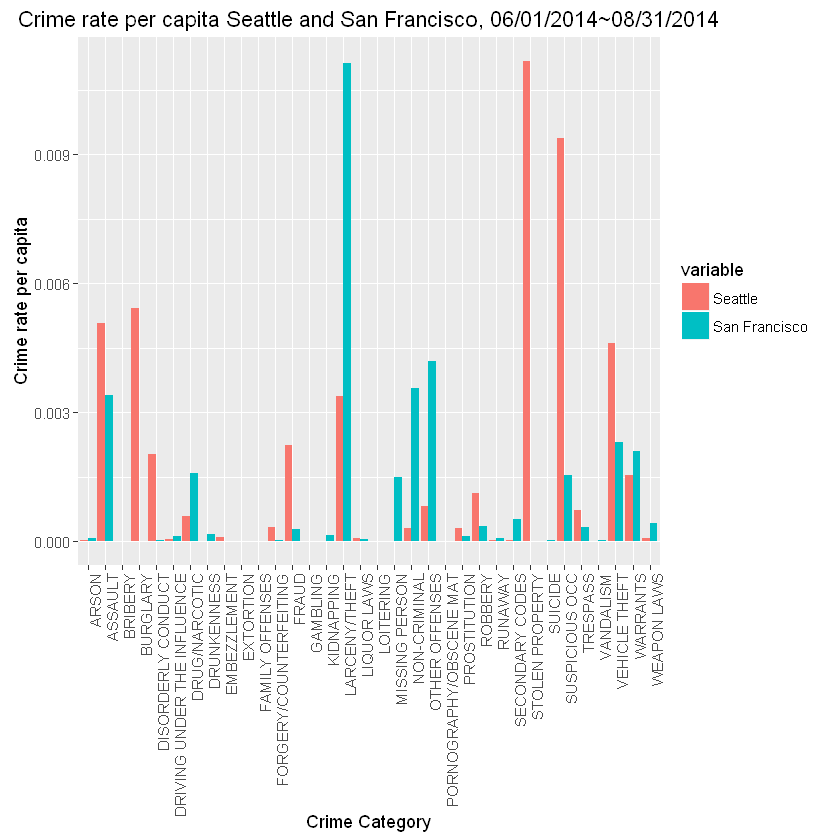

In [46]:
## Fig.10 ##
N_sea <- ddply(sea[var1], var2, summarise, Ncrimes = sum(Ncrimes)/663410)
N_sf <- ddply(sf[variables3], variables4,summarise, Ncrimes = sum(Ncrimes)/850294)
colnames(N_sea) <- colnames(N_sf)
Ncrimes9 <- merge(N_sea, N_sf, by="Category", all=TRUE)
colnames(Ncrimes9) <-c("Category","Seattle","San Francisco")
Ncrimes9_m <- melt(Ncrimes9[,c('Category', 'Seattle','San Francisco')], id.vars=1)
p_train <- ggplot(data = Ncrimes9_m, aes(x=Category, y=value)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_bar(aes(fill = variable), stat="identity",position = "dodge") +
  xlab("Crime Category") +  ylab("Crime rate per capita") +
  ggtitle("Crime rate per capita Seattle and San Francisco, 06/01/2014~08/31/2014")
p_train

Figure 10. Seattle tends to have more crime than San Francisco per capita. The crime rates are 0.049 and 0.034 for Seattle and San Francisco respectively. Larceny/Theft has been a little leveled down after normalized by capita.